### Importing the Data

In [85]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
price=pd.read_csv('NYC_Airbnb/airbnb_price.csv')
review=pd.read_csv('NYC_Airbnb/airbnb_last_review.csv')
room=pd.read_excel('NYC_Airbnb/airbnb_room_type.xlsx')

In [35]:
price.head()

,listing_id,price,nbhood_full
0,2595,225 dollars,"Manhattan, Midtown"
1,3831,89 dollars,"Brooklyn, Clinton Hill"
2,5099,200 dollars,"Manhattan, Murray Hill"
3,5178,79 dollars,"Manhattan, Hell's Kitchen"
4,5238,150 dollars,"Manhattan, Chinatown"


In [36]:
review.head()

,listing_id,host_name,last_review
0,2595,Jennifer,May 21 2019
1,3831,LisaRoxanne,July 05 2019
2,5099,Chris,June 22 2019
3,5178,Shunichi,June 24 2019
4,5238,Ben,June 09 2019


In [37]:
room.head()

,listing_id,description,room_type
0,2595,Skylit Midtown Castle,Entire home/apt
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
3,5178,Large Furnished Room Near B'way,private room
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt


### Cleaning the Price Column

In [38]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   price        25209 non-null  object
 2   nbhood_full  25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


In [39]:
price['price']=price['price'].str.strip(' dollars')
price['price']=price['price'].astype(int)
price.head()

,listing_id,price,nbhood_full
0,2595,225,"Manhattan, Midtown"
1,3831,89,"Brooklyn, Clinton Hill"
2,5099,200,"Manhattan, Murray Hill"
3,5178,79,"Manhattan, Hell's Kitchen"
4,5238,150,"Manhattan, Chinatown"


### Calculating Average Price

In [40]:
price['price'].describe()

count    25209.000000
mean       141.777936
std        147.349137
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       7500.000000
Name: price, dtype: float64

#### The min price is '0' which needs to be removed as the rooms cant be for free. Three quarters of the prices are 175 or less but also the max price is '7500' which is an outlier. 

In [43]:
#Removing the rows where price is zero

price=price[price.price!=0]
price['price'].describe()

count    25202.000000
mean       141.817316
std        147.350650
min         10.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       7500.000000
Name: price, dtype: float64

In [45]:
# Calculating the average price

avg_price=round(price['price'].mean(),2)
avg_price

141.82

### Comparing costs to the private rental market

#### As per the data from Zumper, as of February 5, 2023, the average rent for a 1-bedroom apartment in New York, NY is $3,495 per month.

In [46]:
# Calculating the monthly price of each listings

price['price_per_month']=price['price']*365/12

#Calculating the average price per month for airbnb

avg_price_per_month=round(price['price_per_month'].mean(),2)
avg_price_per_month

4313.61

In [48]:
print("The Airbnb monthly charges is ${}, whereas in the private rental market you would pay {}.".format(avg_price_per_month,"$3,495.00"))

The Airbnb monthly charges is $4313.61, whereas in the private rental market you would pay $3,495.00.


### Cleaning the room type column

In [49]:
room.room_type.unique()

array(['Entire home/apt', 'private room', 'Private room',
       'entire home/apt', 'PRIVATE ROOM', 'shared room',
       'ENTIRE HOME/APT', 'Shared room', 'SHARED ROOM'], dtype=object)

In [50]:
room['room_type']=room['room_type'].str.capitalize()
room['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [52]:
room['room_type'].value_counts()

Entire home/apt    13266
Private room       11356
Shared room          587
Name: room_type, dtype: int64

### Timeframe of the data

In [55]:
# Change the data type of last_reviews to datetime

review['last_review']=pd.to_datetime(review['last_review'])

first_review=review['last_review'].dt.date.min()
last_review=review['last_review'].dt.date.max()

print("The timeframe of the data is between {} and {}".format(first_review,last_review))

The timeframe of the data is between 2019-01-01 and 2019-07-09


In [67]:
review.rename(columns={' listing_id':'listing_id'},inplace=True)

Text(0.5, 1.0, '# Reviews by Month')

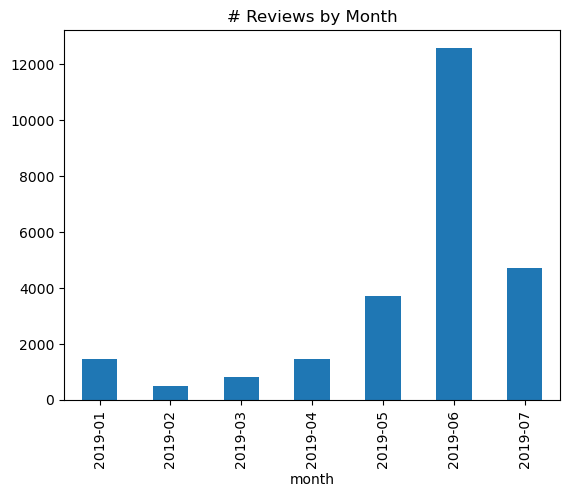

In [82]:
review['month']=review['last_review'].dt.to_period('M')

review.groupby('month')['last_review'].count().plot.bar()
plt.title('# Reviews by Month')

In [83]:
review=review.drop(columns='month',axis=1)

### Joining the Dataframes

In [69]:
# Merging the 3 dataframes to a single airbnb dataframe

airbnb=price.merge(room,how='outer',on='listing_id').merge(review,how='outer',on='listing_id')
airbnb.head()

,listing_id,price,nbhood_full,price_per_month,description,room_type,host_name,last_review
0,2595,225.0,"Manhattan, Midtown",6843.750000,Skylit Midtown Castle,Entire home/apt,Jennifer,2019-05-21
1,3831,89.0,"Brooklyn, Clinton Hill",2707.083333,Cozy Entire Floor of Brownstone,Entire home/apt,LisaRoxanne,2019-07-05
2,5099,200.0,"Manhattan, Murray Hill",6083.333333,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,Chris,2019-06-22
3,5178,79.0,"Manhattan, Hell's Kitchen",2402.916667,Large Furnished Room Near B'way,Private room,Shunichi,2019-06-24
4,5238,150.0,"Manhattan, Chinatown",4562.500000,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,Ben,2019-06-09


In [70]:
airbnb.isnull().sum()

listing_id          0
price               7
nbhood_full         7
price_per_month     7
description        10
room_type           0
host_name           8
last_review         0
dtype: int64

In [72]:
# Drop missing values from airbnb dataset

airbnb.dropna(inplace=True)
airbnb.isnull().sum()

listing_id         0
price              0
nbhood_full        0
price_per_month    0
description        0
room_type          0
host_name          0
last_review        0
dtype: int64

### Analyzing listing prices by NYC Borough

In [74]:
# Extract the boroughs from nbhood_full column

airbnb['borough']=airbnb['nbhood_full'].str.partition(",")[0]
airbnb['borough'].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [77]:
borough=airbnb.groupby("borough")["price"].agg(["sum","mean","count"])
borough=borough.round(2).sort_values("mean",ascending=False)
borough

,sum,mean,count
borough,,,
Manhattan,1898417.0,184.04,10315
Brooklyn,1275250.0,122.02,10451
Queens,320715.0,92.83,3455
Staten Island,22974.0,86.04,267
Bronx,55156.0,79.25,696


array([<AxesSubplot:ylabel='count'>], dtype=object)

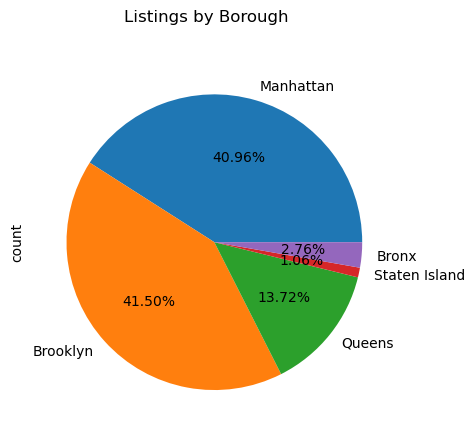

In [84]:
borough['count'].plot(kind='pie',autopct='%.2f%%',subplots=True,title='Listings by Borough')

### Types of Listings

<AxesSubplot:title={'center':'Type of listings'}, ylabel='room_type'>

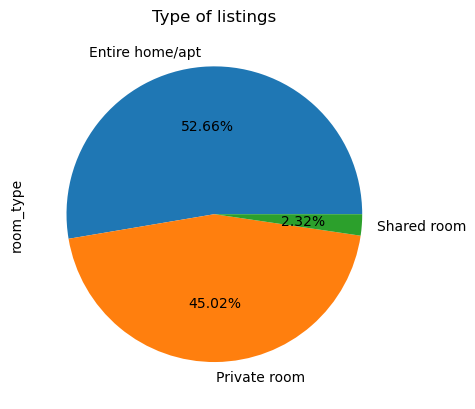

In [80]:
airbnb['room_type'].value_counts().plot(kind='pie',autopct='%.2f%%',title='Type of listings')

### Price by Borough

[Text(0.5, 1.0, 'Price by Borough and Room Type')]

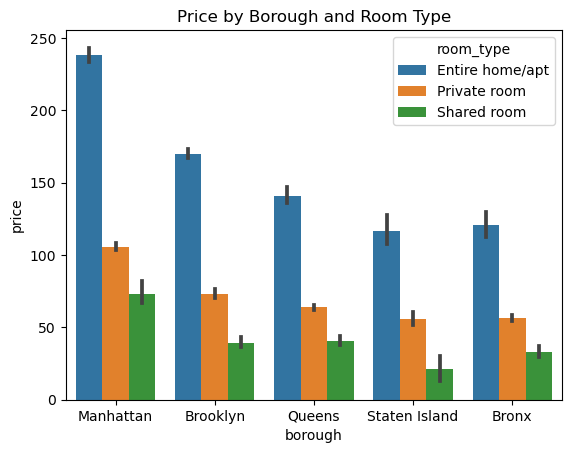

In [86]:
sns.barplot(x='borough',y='price',hue='room_type',data=airbnb).set(title='Price by Borough and Room Type')